In [2]:
pip install PyOpenGL

Note: you may need to restart the kernel to use updated packages.


In [1]:
#                       Y AND X are inverted

rd=0.01745329
lar=[]
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:

fov=100
ppx=13 #player position in x 
ppy=2 #player position in y
pva=0 #player view angle
GameResolution=[720,1280]
miniMapResolution=[480,854]
MapSize=[16,16]

In [3]:
mp=[[1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 1, 1.,1],
    [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,1],
    [1,0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,1],
    [1,1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,1],
    [1,0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0, 1],
    [1,0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,1],
    [1,1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,1],
    [1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 0, 0.,1  ],
    [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 1, 1.,1]]

mpd=[[1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 1, 1.,1],
    [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,1],
    [1,0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,1],
    [1,1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,1],
    [1,0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0, 1],
    [1,0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,1],
    [1,1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,1],
    [1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 0, 0.  ,1  ],
    [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 1, 1.,1]]



WAllTextur=[]
widthOfWall=5;
distance=[4,2,4,2]
wdn=-1
d=0
for i in range(17):
    adder=[]
    if i%4==0 and wdn<3:
        wdn+=1
        d=distance[wdn]
        
    for y in range(17):
        if(i%4==0 ):#or y==0 or y==16):
            adder.append(1)
        elif(y==d):
            adder.append(1)
            d+=widthOfWall
        else:
            adder.append(0) 
    WAllTextur.append(adder)
    d=distance[wdn]        
        
        
        

#creating wall texture

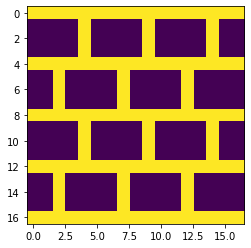

In [4]:
plt.imshow(WAllTextur)
#WAllTextur

# ##############
# 3D Renderer:   
# ##############


In [11]:
#########################################################################################################
###################################### THE 3D RENDERER ##################################################
#########################################################################################################


def threDRenderer(posi,posy,pva,frame):
    
    RayDiff=fov/GameResolution[1]
    initialColm=0
    colLen=1
    nextCol=initialColm+colLen
    a=pva+fov/2
    
    
    while(a>pva-fov/2):
    
        
        lar=lineTracer(posi,posy,0,a,1) #getting line 
        #(posi,posy,dist,pva,Wmode)\
        
        
        
        ##Calculation of the perpendicuar distance to the wall
        
        p=((posi-lar[-1][2][0])**2 + (posy-lar[-1][2][1])**2)**0.5 ##Finding distance to that intercection
        p=(math.cos(rd*abs(a-pva)))*p
        #print("P: ",p)
    #####################################
        if p==0:
            
            wallHeight=0
            
        else:
            
            wallHeight=int((GameResolution[0])/(p/30))
        
        multiplier=int(wallHeight/17)
        
        #print("wallHeight",wallHeight)
    #####################################    
        ofset=(GameResolution[0]/2)
        rngi=ofset-wallHeight/2
        rngy=ofset+wallHeight/2
        #print("rngi",rngi)
    #####################################  
        #print("rngy",rngy)
    #####################################
        #column selector
        if(lar[-1][2][0]%1>0):
            per=lar[-1][2][0]%1
        else:
            per=lar[-1][2][1]%1
        #print("per: ",per)
        #if per>= 1:
        #    per=0.99
            
        col=17*per
        
        col=int(col)
        #print("Col :",col)
        #coll upscaler
        
        coll=[]
        freeSpaces=wallHeight-(multiplier*17)
        for i in range(17):
            x=WAllTextur[i][col]
            if(i<=freeSpaces):
                coll.append(x)
            for y in range(multiplier):
                coll.append(x)
                                                                                        
            
        
        
        
        
        #collen=len(coll)
        #print("g")
        #print("(",lar[-1][2][0],",",lar[-1][2][1] ,")")
        for i in range(int(initialColm),int(nextCol)):
            colind=0
            for y in range(0,GameResolution[0]):
                if(y>=rngi and y<=rngy):# and colind<collen):
                    
                    frame[y][i][0]=coll[colind]
                    frame[y][i][1]=coll[colind]
                    frame[y][i][2]=coll[colind]
                    colind+=1
                    
         
                elif(y<rngi):
                    
                    frame[y][i][2]=1
                    
                
                    
        initialColm=nextCol
        nextCol+=1
        if(nextCol>GameResolution[1]):
            break
        a+=RayDiff*(-1)    
    return(frame)


# ###########################
# Line Tracer

In [1]:
def lineTracer(y,x,lineAngle,Levelmap):##2.0
    lineTangent=math.tan(lineAngle)
    
    delx=x-int(x)
    
    dely=y-int(y)
    
    y+=1
    
    lineTraceCompletionStatus=0
    while lineTraceCompletionStatus==0:
        
        foundYIntercept=0
        #if y intercept is not found then x axis is calculated
        
        
        ##############       Y AXIS            ################
        if lineAngle<90 or lineAngle>270:
            xa=1-delx
            h=lineTangent(xa)
            
        ##code working ok sudo checked
            
        else:
            if(delx!=0):
                xa=-delx
                h=lineTangent(xa)
                
            else:
                xa=-1
                h=lineTangent(xa)
        
        if (dely-h>=0 and dely-h<=1) or (dely==0 and h<=-1 and h<0):
            x+=xa
            y-=h
            dely-=h
            delx=0
            foundYIntercept=1
        
        
        ##############       X AXIS            ################
        if(foundYIntercept==0):#if y intercept failed find x intercept
            
            if lineAngle>0 or lineAngle<180:
                if dely!=0:
                    b=dely/lineTangent
                else:
                    b=1/lineTangent
            else:
                b=(1-del)/lineTangent
            
            if delx+b==1 or delx+b==0:
                dely=0
                delx=
                
                
   

SyntaxError: invalid syntax (<ipython-input-1-667d627a5e7d>, line 52)

405
60


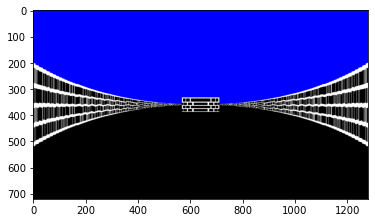

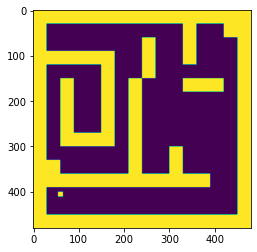

Dir dis ang


In [ ]:
##map upscler code

map_Y_Miltiplier=int(miniMapResolution[0]/MapSize[0]) 
map_X_Miltiplier=int(miniMapResolution[1]/MapSize[1])
#these multiplier no whn multiplies to orignal size of the map gives map in almost 480p Res


#this is where the higher resolution is calculated.
mapy=MapSize[0]*map_Y_Miltiplier    #first using y multiplier 
mapx=MapSize[1]*map_Y_Miltiplier
if(mapx>miniMapResolution[1]):      #thn if the resolution is not corrrect 
    mapy=MapSize[0]*map_X_Miltiplier#we will use x multipler 
    mapx=MapSize[1]*map_X_Miltiplier
    map_Y_Miltiplier=map_X_Miltiplier#the main multipler in all eq will be y multiplier so... put the right multiplier in it 
    
    



#this is the map resolution close to 480p

miniMap=np.zeros([mapy,mapx])
miniMapInfo=np.zeros([mapy,mapx])
i=0
y=0
mmi=0
mmy=0
while True:
    if(mmi<MapSize[0]):
        y=0
        mmy=0
        while True:
            if(mmy<MapSize[1]):
                #print(mmi)
                #print(mmy)
                if(mp[mmi][mmy]==1):
                    for x in range(i,i+map_Y_Miltiplier):
                        for z in range(y,y+map_Y_Miltiplier):
                            miniMap[x][z]=1
                            miniMapInfo[x][z]=1
                y+=map_Y_Miltiplier
                mmy+=1
            else:
                break
    else:
        break
    i+=map_Y_Miltiplier
    mmi+=1
    
                                ##############################
                                ####### GAME AREA :###########
                                ##############################
            
########################################################################################
                                #1. #Game Initialization 
########################################################################################


######################################
    #   INITIALIZING VARIABLES  #
######################################



fov=100
ppx=13.5 #player position in x 
ppy=2 #player position in y
pva=100 #player view angle
playerSize=5
StepSize=20
GameResolution=[720,1280]
miniMapResolution=[480,854]
MapSize=[16,16]
angleLinePAth1=[]
angleLinePAth2=[]
angleLinePAth2=[]

######################################    (Not in working Condition)
    #   INITIALIZING METHODS  #
######################################



##Draws the player and the direction stick ahead of the player 
def DrawPlayer(posi,posy,mapar):#gets player position in x and y cordinates in the frame matrix
    for i in range(posi-playerSize,posi+playerSize+1):
        for y in range(posy-playerSize,posy+playerSize+1):
            mapar[i][y]=1
            
            
            
            
##Removes remains of the player and the direction stick of the player 
def RemPlayer(posi,posy,mapar):#gets player position in x and y cordinates in the frame matrix
    for i in range(posi-playerSize,posi+playerSize+1):
        for y in range(posy-playerSize,posy+playerSize+1):
            mapar[i][y]=0







######################################  
    # LINE FUNCTIONS    #
######################################

def drawLine(thickness,lar,mapvr):
    thickness=int(thickness/2)
    for i in lar:
        for x in range(i[0]-thickness,i[0]+thickness+1):
            for y in range(i[1]-thickness,i[1]+thickness+1):
                mapvr[x][y]=1
    
def remLine(thickness,lar,mapvr):
    thickness=int(thickness/2)
    for i in lar:
        for x in range(i[0]-thickness,i[0]+thickness+1):
            for y in range(i[1]-thickness,i[1]+thickness+1):
                mapvr[x][y]=0
                
def isWall(MpInfo,x,y):
    if(mpInfo[x][y]>=1):
        return(True)
    return(False)
    
    
    
    


    
    
###########################
#  Player motion Handeler 
###########################
    ## this moves the player stratigically int the map 
    ## What this function does .
    ## Calculation of new location of the player 
    ## Collision detection.
    ## the movement should be acording to where the player is looking

def MovPlayer(posi,posy,pva,mapar,direction,dis,        na,lar):  ## this is work in progress.  (Changes to the line(pva,dis,na))
                                               #,#new angle(add it to current player angle)
    
    
    
    pva=pva+na
    print("New player angle",pva)
     
    if(pva>360):
        pva-=360
    RemPlayer(posi,posy,mapar)
    remLine(3,lar,mapar)
    
    
    ## Collision detection 
    lar=lineTracer(posi,posy,45,pva,1)
    le=len(lar)## giving the distance that player will move
    if(le-40-1>=0 and le-40 <=dis*StepSize):
        psoi=lar[le-40-1][0]
        psoy=lar[le-40-1][1]
    #tracing a straight line from the player ...... finding sitance from the wall
     
    
    if(direction=='w'):
        posi-=(StepSize*dis)
    elif(direction=='s'):
        posi+=(StepSize*dis)
    elif(direction=='d'):
        posy+=(StepSize*dis)
    elif(direction=='a'):
        posy-=(StepSize*dis)
    DrawPlayer(posi,posy,mapar)
    lar=lineTracer(posi,posy,45,pva,1)
    drawLine(3,lar,mapar)
    return(posi,posy,lar,pva)






ppx=int(ppx*map_Y_Miltiplier)
ppy=int(ppy*map_Y_Miltiplier)
pva=0
lar=[[ppx,ppy]]
print(ppx)
print(ppy)
print
DrawPlayer(ppx,ppy,miniMap)

fov/=2



########################################################################################
                                #2. GAME LOOP   (ADD A WAY TO CALCUALTE FPS)
########################################################################################
#cv2.namedWindow('Doom Clone',cv2.WINDOW_AUTOSIZE)
while True:
    ##########
    #3d frame
    Frame=np.zeros([GameResolution[0],GameResolution[1],3])
    Frame=threDRenderer(ppx,ppy,pva,Frame)
    plt.imshow(Frame)
    plt.show()
    
    
    
    
    
    ###########
    plt.imshow(miniMap)
    plt.show()
    #cv2.imshow('Doom', miniMap)
    print("Dir dis ang")
    
    #make a try catch block here
    
    direction,dis,ang=input().split()
    if direction=="exit":
        break
    dis=int(dis)
    ang=int(ang)
    ppx,ppy,lar,pva=MovPlayer(ppx,ppy,pva,miniMap,direction,dis,ang,lar)
    #print(ppx)
    #print(ppy)
#cv2.destroyAllWindows()

In [ ]:
cv2.imshow("BEAST ENGINE",Frame)

In [ ]:
import cv2

In [ ]:
math.tan(45*rd)

In [4]:
abs(-1)

1

In [ ]:
pip insta